In [2]:
import time
import datetime
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

plt.style.use('fivethirtyeight')

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [3]:
ticker='DIS'
period1 = int(time.mktime(datetime.datetime(2015, 1, 1, 0, 0).timetuple()))
period2 = int(time.mktime(datetime.datetime.now().timetuple()))
interval = '1d' # 1d, 1m
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
df = pd.read_csv(query_string)

In [4]:
df['symbol']='DIS'
df.index=pd.to_datetime(df['Date'])
df=df.drop(['Date'],axis='columns')
df
#df.to_csv('DIS.csv')

,Open,High,Low,Close,Adj Close,Volume,symbol
Date,,,,,,,
2015-01-02,94.910004,95.279999,92.849998,93.750000,87.376259,5865400,DIS
2015-01-05,93.279999,93.349998,91.779999,92.379997,86.099403,7789400,DIS
2015-01-06,92.570000,93.190002,91.160004,91.889999,85.642723,6793100,DIS
2015-01-07,92.720001,93.150002,92.099998,92.830002,86.518806,6589500,DIS
2015-01-08,93.870003,94.300003,93.559998,93.790001,87.413551,7579400,DIS
...,...,...,...,...,...,...,...
2022-01-24,134.820007,137.679993,129.259995,137.460007,137.460007,31523800,DIS
2022-01-25,135.289993,137.750000,132.380005,136.509995,136.509995,14694400,DIS
2022-01-26,137.710007,138.199997,132.259995,133.600006,133.600006,14550400,DIS


In [5]:
df=df[['Close']]
df

,Close
Date,
2015-01-02,93.750000
2015-01-05,92.379997
2015-01-06,91.889999
2015-01-07,92.830002
2015-01-08,93.790001
...,...
2022-01-24,137.460007
2022-01-25,136.509995
2022-01-26,133.600006


In [6]:
#Create a variable to predict 'x' days out the future
future_days=100
#Create a new column (target) shifted 'x' units/dayys up
df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4)

<ipython-input-6-d8e26e26d5bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction']=df[['Close']].shift(-future_days)


,Close,Prediction
Date,,
2022-01-25,136.509995,NaN
2022-01-26,133.600006,NaN
2022-01-27,135.419998,NaN
2022-01-28,138.630005,NaN


In [7]:
X= np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[ 93.75    ]
 [ 92.379997]
 [ 91.889999]
 ...
 [181.860001]
 [181.      ]
 [184.339996]]


In [8]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[110.529999 110.370003 110.959999 ... 133.600006 135.419998 138.630005]


In [9]:
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [10]:
tree = DecisionTreeRegressor().fit(x_train,y_train)

In [11]:
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[187.259995],
       [187.429993],
       [182.789993],
       [183.110001],
       [182.759995],
       [183.020004],
       [184.270004],
       [184.639999],
       [183.389999],
       [185.330002],
       [186.020004],
       [185.509995],
       [184.25    ],
       [181.509995],
       [181.789993],
       [184.839996],
       [184.300003],
       [181.669998],
       [177.850006],
       [178.339996],
       [173.699997],
       [170.080002],
       [169.679993],
       [169.270004],
       [171.360001],
       [172.399994],
       [174.309998],
       [176.169998],
       [176.470001],
       [179.039993],
       [178.649994],
       [178.839996],
       [177.      ],
       [176.240005],
       [177.179993],
       [176.990005],
       [176.330002],
       [176.039993],
       [176.570007],
       [177.380005],
       [178.179993],
       [175.860001],
       [174.660004],
       [174.649994],
       [172.419998],
       [173.970001],
       [173.5     ],
       [175.3

In [12]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[185.149994 185.910004 184.119995 183.649994 182.399994 183.649994
 183.339996 183.470001 178.610001 171.169998 173.649994 176.25
 176.       176.009995 133.600006 172.679993 169.169998 176.009995
 158.429993 178.649994 151.339996 169.679993 176.740005 173.520004
 173.130005 172.960007 174.449997 176.460007 171.139999 171.179993
 170.550003 171.339996 169.419998 172.009995 172.039993 169.550003
 169.679993 151.050003 157.330002 169.830002 170.080002 170.279999
 175.630005 176.869995 175.110001 174.449997 162.110001 159.630005
 158.429993 178.649994 157.330002 155.580002 184.839996 154.160004
 151.029999 151.339996 148.110001 147.809998 144.899994 138.630005
 147.199997 146.220001 150.369995 150.809998 148.110001 155.929993
 152.710007 150.429993 149.100006 150.399994 150.809998 148.759995
 178.649994 151.050003 151.880005 177.850006 175.110001 155.199997
 154.869995 155.929993 154.889999 156.759995 150.809998 135.419998
 156.899994 157.830002 156.600006 157.889999 157.800003 179.039993

In [13]:
rms=np.sqrt(np.mean(np.power((x_future-tree_prediction),2)))
rms

21.536816020895188

<ipython-input-14-25d4e7f4563d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


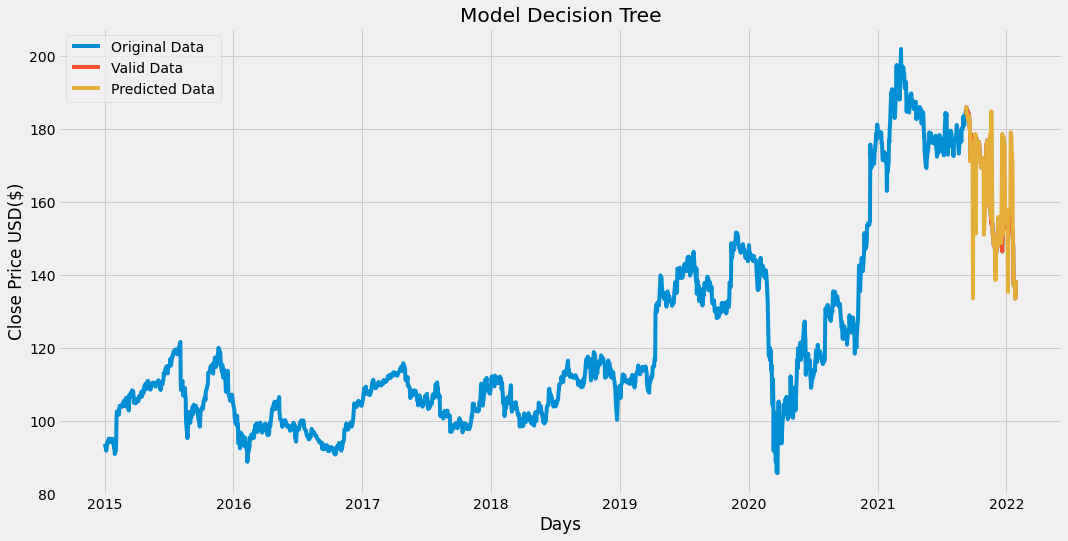

In [14]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model Decision Tree')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original Data','Valid Data', 'Predicted Data'])
plt.show()